### 로이터 뉴스 분류하기 - LSTM

- 데이터 탐색

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data()
len(X_train), len(X_test)

2121728/2110848 [==============================] - 0s 0us/step


(8982, 2246)

In [3]:
# 카테고리 갯수
max(y_train) + 1

46

In [4]:
# 첫번째 뉴스
print(X_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
type(reuters.get_word_index())

565248/550378 [==============================] - 0s 0us/step


dict

In [6]:
reuters.get_word_index()["the"]

1

In [7]:
index_word = {}
for key, value in reuters.get_word_index().items():
    index_word[value] = key
len(index_word)

30979

In [8]:
# 첫번째 기사 복원
" ".join(index_word[index] for index in X_train[0])

'the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [9]:
# 뉴스 기사의 최대길이, 평균길이
max(len(s) for s in X_train), sum(map(len, X_train)) / len(X_train)

(2376, 145.5398574927633)

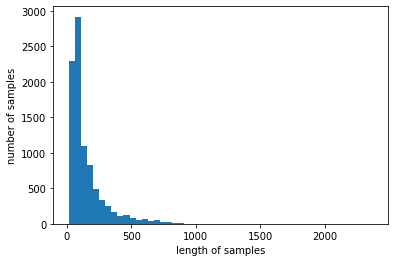

In [10]:
# 뉴스 기사 단어수의 분포
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

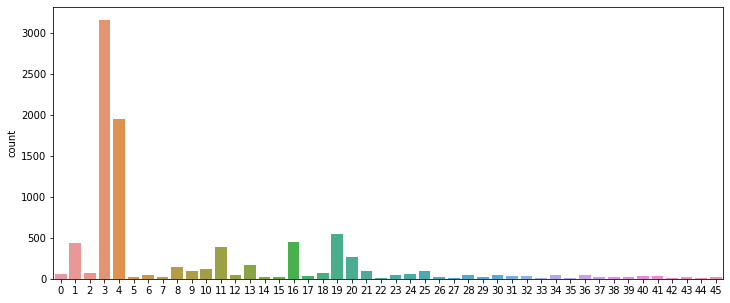

In [11]:
# 뉴스 그룹의 분포
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,5))
sns.countplot(y_train);

#### LSTM으로 로이터 뉴스 분류
- 문장길이:100단어까지 (최대:2376)
- 단어 : 빈도수 기준 1000단어 (총 단어수 : 30979)


In [12]:
max_words = 1000
max_len = 100

In [13]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words = max_words, test_split = 0.2
)

In [14]:
import numpy as np
import tensorflow as tf
seed = 2022
tf.random.set_seed(seed)
np.random.seed(seed)

In [15]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [16]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8982, 100), (2246, 100), (8982, 46), (2246, 46))

- 모델 정의/설정/학습

In [17]:
model = Sequential([
        Embedding(max_words, 64, input_length = max_len),
        LSTM(100),
        Dense(46, activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           64000     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 134,646
Trainable params: 134,646
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile("adam", "categorical_crossentropy", ["accuracy"])

In [19]:
model_path = "best-reuters-LSTM.h5"
mc = ModelCheckpoint(model_path, save_best_only = True, verbose = 1)
es = EarlyStopping(patience = 10)

In [22]:
hist = model.fit(X_train, y_train, epochs = 100,
          callbacks = [mc, es], batch_size = 200,
          validation_split = 0.2)

Epoch 1/100
36/36 [==============================] - ETA: 0s - loss: 0.7686 - accuracy: 0.8074
Epoch 1: val_loss did not improve from 1.31792
36/36 [==============================] - 1s 24ms/step - loss: 0.7686 - accuracy: 0.8074 - val_loss: 1.3297 - val_accuracy: 0.6945
Epoch 2/100
36/36 [==============================] - ETA: 0s - loss: 0.7516 - accuracy: 0.8086
Epoch 2: val_loss did not improve from 1.31792
36/36 [==============================] - 1s 16ms/step - loss: 0.7516 - accuracy: 0.8086 - val_loss: 1.3748 - val_accuracy: 0.6828
Epoch 3/100
34/36 [===========================>..] - ETA: 0s - loss: 0.7480 - accuracy: 0.8118
Epoch 3: val_loss did not improve from 1.31792
36/36 [==============================] - 0s 12ms/step - loss: 0.7491 - accuracy: 0.8106 - val_loss: 1.3925 - val_accuracy: 0.6906
Epoch 4/100
31/36 [========================>.....] - ETA: 0s - loss: 0.7103 - accuracy: 0.8240
Epoch 4: val_loss did not improve from 1.31792
36/36 [==============================] - 0

In [23]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

71/71 [==============================] - 1s 5ms/step - loss: 1.3331 - accuracy: 0.6776


[1.333093285560608, 0.6776491403579712]

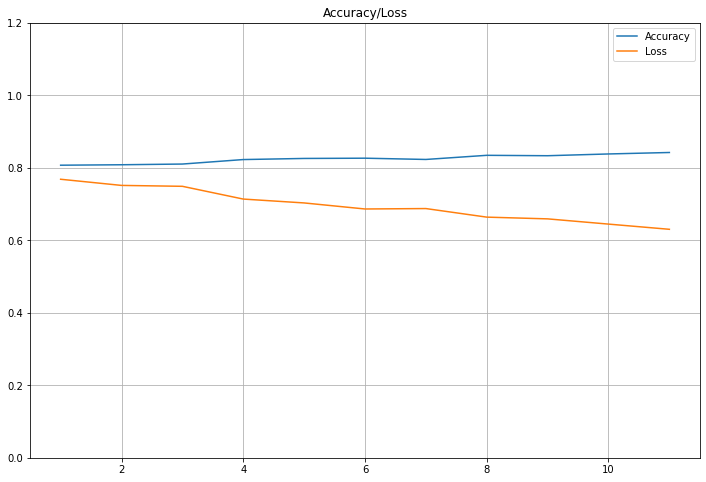

In [24]:
import matplotlib.pyplot as plt

y_acc = hist.history["accuracy"]
y_loss = hist.history["loss"]
xs = np.arange(1, len(y_acc) + 1)

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label="Accuracy")
plt.plot(xs, y_loss, label="Loss")
plt.grid(),plt.legend(),plt.title("Accuracy/Loss")
plt.ylim(0,1.2)
plt.show()